Barcode Assay Alignment 
---
Performed barcode assay (UTexas) at same time as data from C. Hayford (`idling/treated_raw.csv.gz` and `untreated/untreated_raw.csv.gz`).  
Going to check for barcode abundance in both datasets to see if targeted barcode assay corroborates scRNA-seq data.

In [1]:
# load files and packages
from fst_utils import *
from fcc_utils import *
from fcc_DRs import *
from utilityfunctions import *

%matplotlib inline

Using TensorFlow backend.


Read in scRNA-seq data

In [2]:
%%time
# untreated control BRAF melanoma cell line (SKMEL5)
U = RNA_counts.from_file(datafile='untreated/untreated_raw.csv.gz', cells_axis=1, barcodefile='untreated/Untreated_LineageBC_cellBC.csv')
# treated, idling BRAF melanoma cell line (SKMEL5)
I = RNA_counts.from_file(datafile='idling/treated_raw.csv.gz', cells_axis=1, barcodefile='idling/Treated_LineageBC_cellBC.csv')

CPU times: user 32.7 s, sys: 5.82 s, total: 38.5 s
Wall time: 39.6 s


In [79]:
top50 = list(range(1,51))

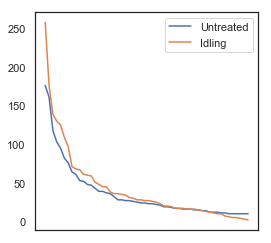

In [80]:
# plot abundance of barcodes to use for distance calcs
plt.figure(figsize=(4,4))
U.barcode_counts(IDs=U.top_barcodes(top50)).plot(label='Untreated', legend=True)
I.barcode_counts(IDs=U.top_barcodes(top50)).plot(label='Idling', legend=True)
plt.show()

Read in associated barcode assay data

In [43]:
%%time
U_bc = pd.read_csv('../barcode_assay/Untreated1_Cody/Untreated1_barcodes.txt', sep='\t', header=None)
I_bc = pd.read_csv('../barcode_assay/Treated1_Cody/Treated1_barcodes.txt', sep='\t', header=None)

CPU times: user 11 s, sys: 1.06 s, total: 12 s
Wall time: 12.5 s


In [58]:
# count instances of unique barcode sequences
U_bc_counts = pd.DataFrame(U_bc[0].value_counts())
U_bc_counts.rename(index=str, columns={0: "Count"}, inplace=True)

In [68]:
# count instances of unique barcode sequences
I_bc_counts = pd.DataFrame(I_bc[0].value_counts())
I_bc_counts.rename(index=str, columns={0: "Count"}, inplace=True)

In [81]:
U_50 = pd.DataFrame(U.barcode_counts(U.top_barcodes(top50))).merge(U_bc_counts, how='left', right_index=True, left_index=True)
I_50 = pd.DataFrame(I.barcode_counts(U.top_barcodes(top50))).merge(I_bc_counts, how='left', right_index=True, left_index=True)

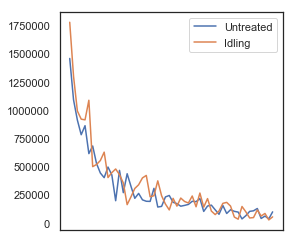

In [82]:
# plot abundance of barcodes to use for distance calcs
plt.figure(figsize=(4,4))
U_50['Count'].plot(label='Untreated', legend=True)
I_50['Count'].plot(label='Idling', legend=True)
plt.show()